In [1]:
%matplotlib inline

In [41]:
from pathlib import Path
from astropy.io import fits
from astropy.visualization import time_support
import os
from fast_histogram import histogram, histogram2d
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML # requires ffmpeg
from astropy.wcs import WCS
from astropy.time import Time
import numpy as np
import pandas as pd

In [3]:
swift_path = '/Users/katborski/Documents/GitHub/AFPSC/Swift/'
skypos = (352.9378,-2.7447) # position of AF Psc

In [30]:
def open_xray(path):
    """Opens Swift X-ray  data files"""
    event_files = []
        
    for visit in os.listdir(swift_path): 
        if visit == '00087201006': # Does not have event data
            continue
        if visit == '00014769003': # Does not have data
            continue
        if visit == '.DS_Store':
            continue
        visit_path = swift_path+visit+'/'

        for file in os.listdir(visit_path+'xrt/event/'):
            if file.endswith('2po_uf.evt.gz'):
                fn=visit_path+'xrt/event/'+file
                event_files.append(fn)
    return(event_files)

In [31]:
event_files = open_xray(swift_path)
len(event_files)


27

/var/folders/rk/8540q6zs19j7wbgwdq52jbv40000gn/T/ipykernel_7758/1305183069.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,3))


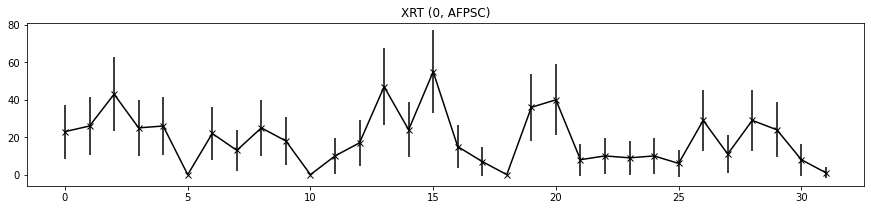

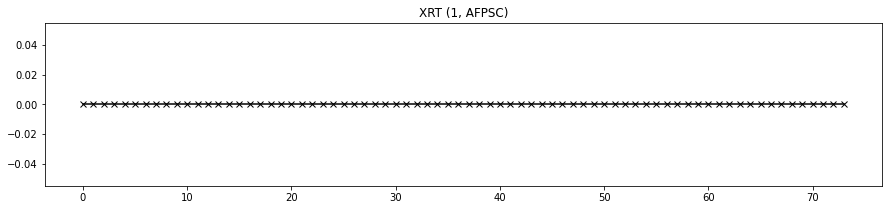

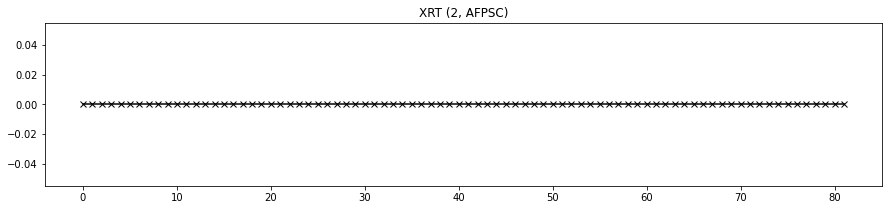

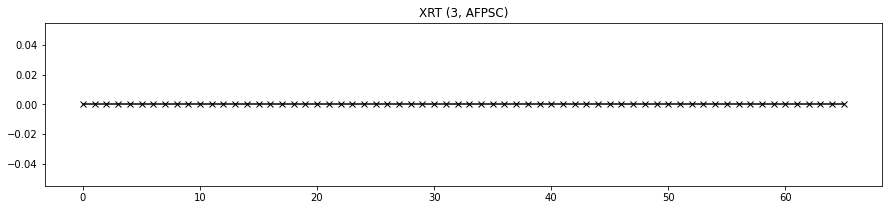

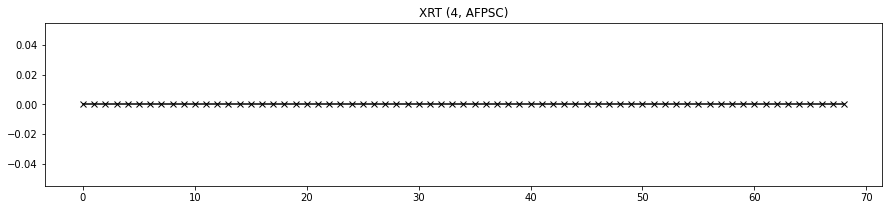

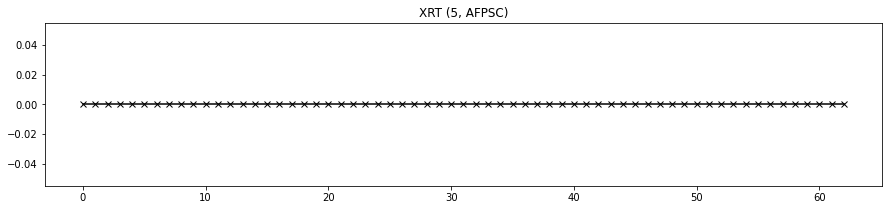

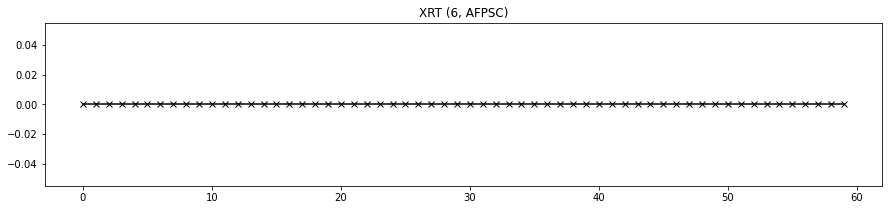

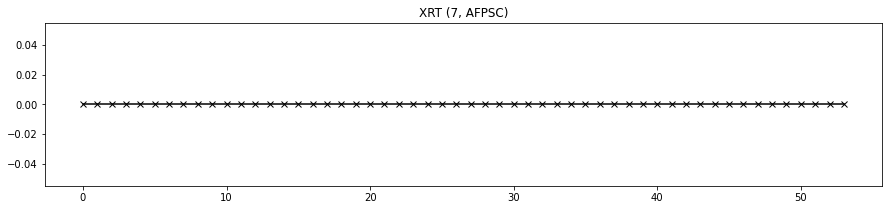

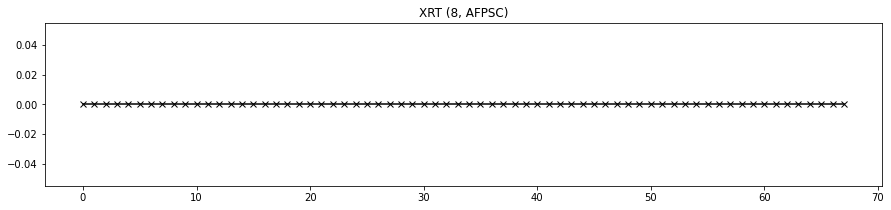

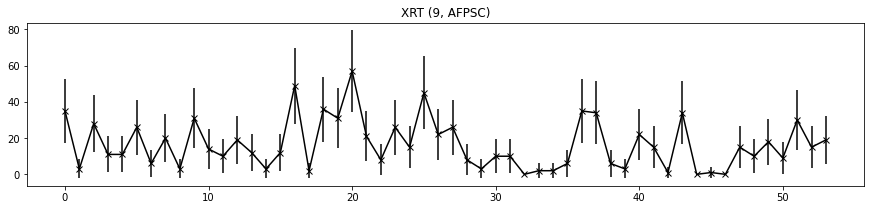

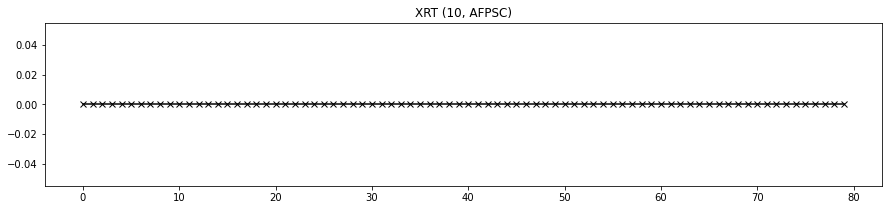

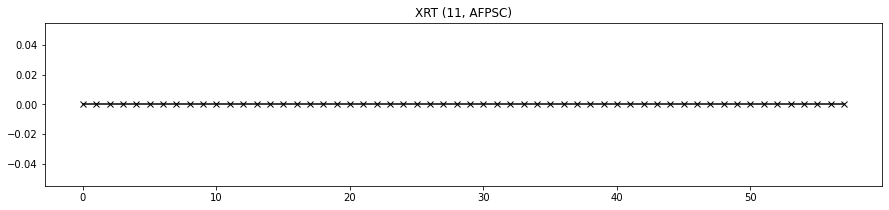

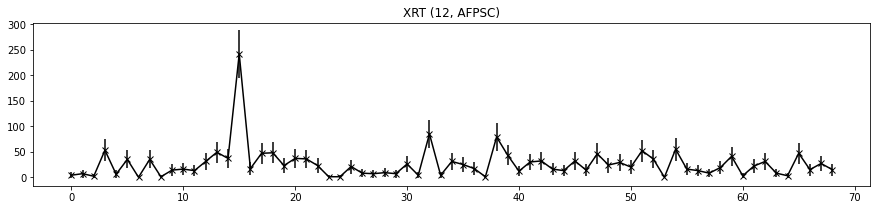

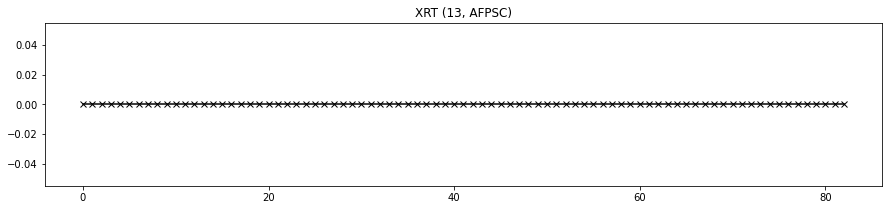

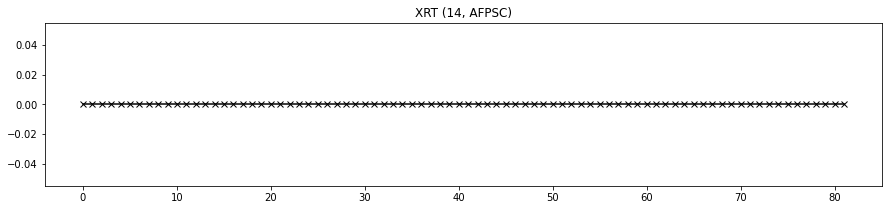

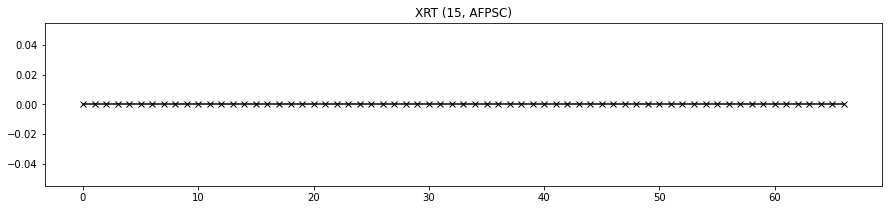

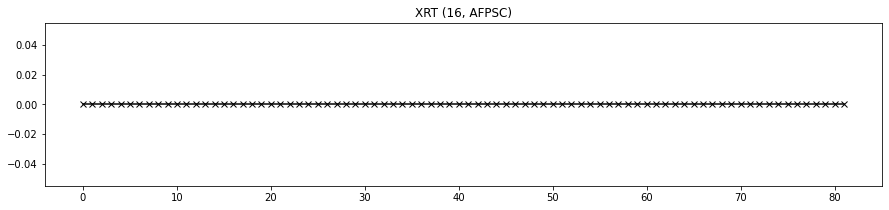

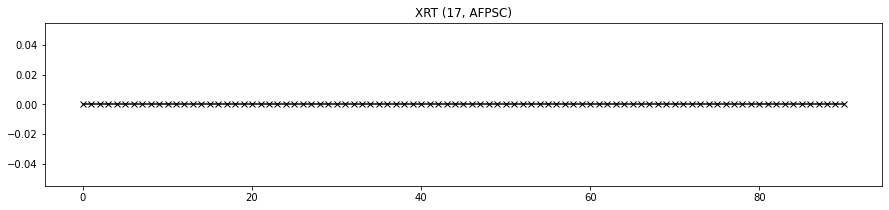

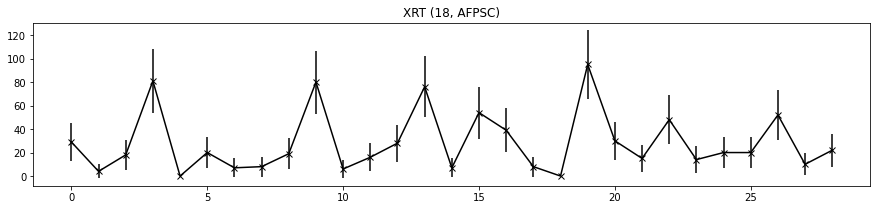

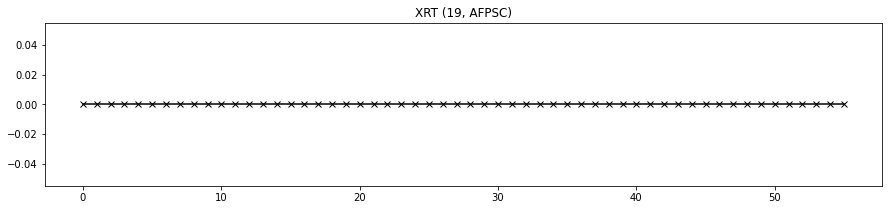

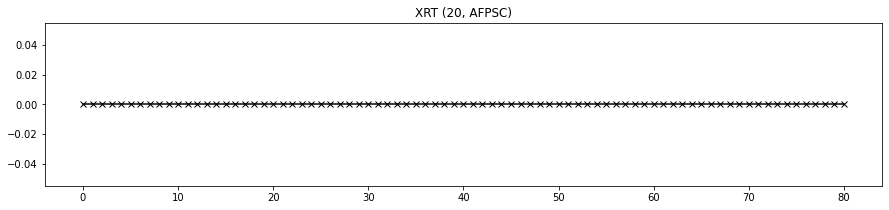

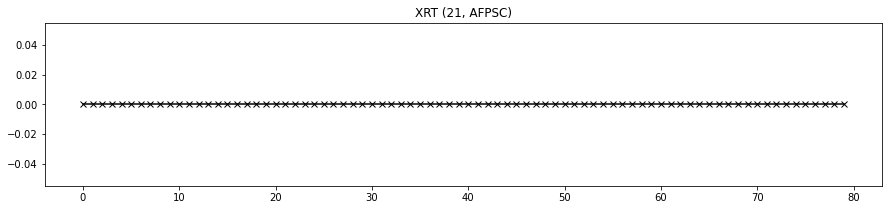

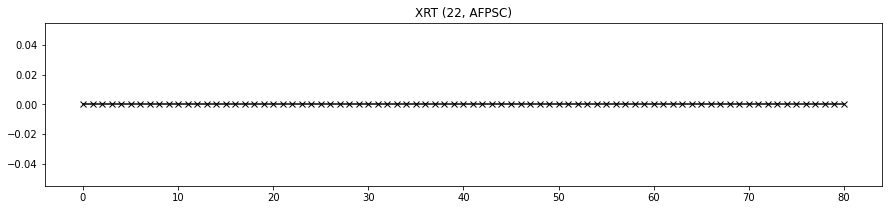

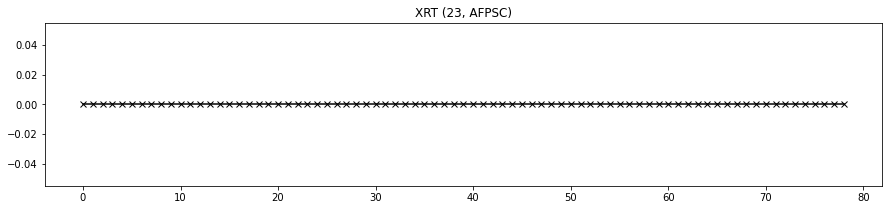

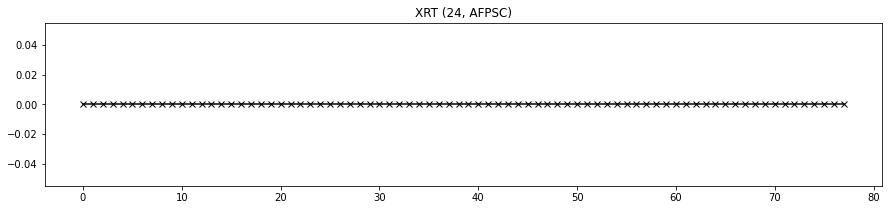

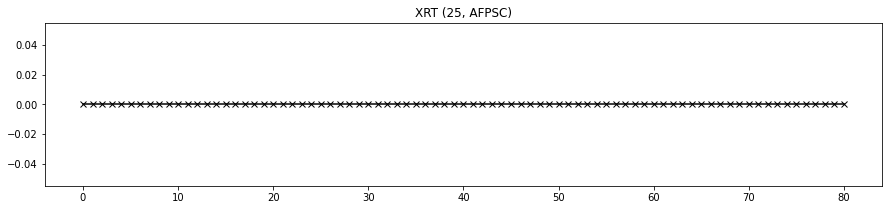

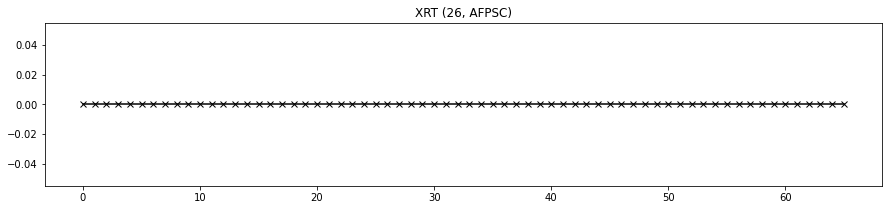

In [32]:
for j,fn in enumerate(event_files):
    f = fits.open(fn)
    data = fits.open(fn)
    events = data[1].data
    t=np.array(events['TIME'])
    x=np.array(events['X'])
    y=np.array(events['Y'])
    
    ra=(x-data[1].header['TCRPX3'])*data[1].header['TCDLT3']+data[1].header['TCRVL3']
    dec=(y-data[1].header['TCRPX4'])*data[1].header['TCDLT4']+data[1].header['TCRVL4']
    ix=np.digitize(t,np.arange(t.min(),t.max(),20))

    margin = 0.01 # degrees
    
    ims = []
    lc = []
    for i in np.unique(ix)[:-1]:
        frame = histogram2d(ra[np.where(ix==i)],
                            dec[np.where(ix==i)],
                            bins=133,
                            range=[[skypos[0]-margin,skypos[0]+margin],
                                   [skypos[1]-margin,skypos[1]+margin]])
        lc+=[frame.sum()]

    plt.figure(figsize=(15,3))
    plt.title(f"XRT ({j}, {fn.split('/')[5]})")
    plt.errorbar(np.arange(len(lc)),lc,yerr=3*np.sqrt(lc),fmt='kx-')

#Plot XRT data
#Flare 12 looks nice in comparison with flare 12 from the UVOT data. 
#From what I'm understanding right now these are all of the XRT data binned 
#the same way the UVOT data was. (?)

#Should these really be this blank or am I missing something here? 
#

In [90]:
#TIME CORRECTION

time = []
for i in t:
    ti = data[1].header['MJDREFI']+((i+data[1].header['UTCFINIT'])/86400)
    time.append(ti)
time = Time(time, format='mjd',scale = 'tt')
time.iso

array(['2021-09-06 12:23:33.138', '2021-09-06 12:23:33.138',
       '2021-09-06 12:23:33.138', ..., '2021-09-06 12:45:33.572',
       '2021-09-06 12:45:33.574', '2021-09-06 12:45:33.574'], dtype='<U23')

In [91]:
#data[1].header

ValueError: setting an array element with a sequence.

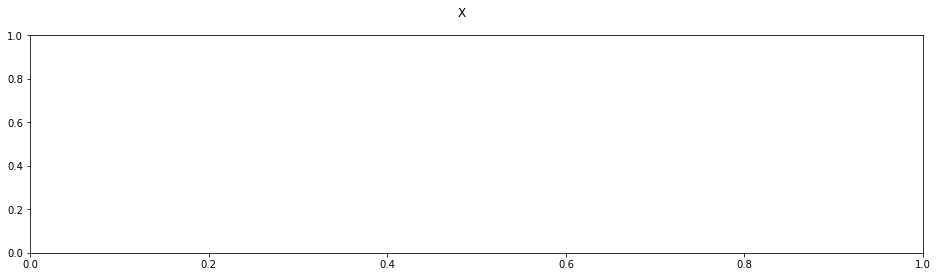

In [94]:
#How does photon position relate to count rate? 

x = events['X']
y = events['Y']
#pos = ?
plt.figure(figsize = (16,4))
plt.suptitle("X")
plt.plot(time,x)
plt.show()
plt.figure(figsize=(16,4))
plt.suptitle("Y")
plt.plot(time,y)

In [95]:
def open_bat(path):
    """Opens Swift Bat data files"""
    event_files = []
        
    for visit in os.listdir(swift_path): 
        if visit == '00087201006': # Does not have event data
            continue
        if visit == '00014769002': # Does not have data
            continue
        if visit == '.DS_Store':
            continue
        visit_path = swift_path+visit+'/'

        for file in os.listdir(visit_path+'bat/event/'):
            if file == '00014769003' or '00014769004' or '00014769010' or '00014769013' or '00014769014' or '00014769019' or '00014769027':
                
                #These are the only files with Swift BAT > Event data, there has to be a better (working) way to make this only
                #go through these 7 files ?
                
                if file.endswith('uf.evt.gz'):
                    fn=visit_path+'bat/event/'+file
                    event_files.append(fn)
    return(event_files)

In [96]:
event_files = open_bat(swift_path)
len(event_files)

#BAT data is confusing me, do I ~need~ the Swift HEASOFT for these analyses? 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/katborski/Documents/GitHub/AFPSC/Swift/00014769005/bat/event/'